# import necessary libraries

In [56]:
import pandas as pd

# import data

In [57]:
bank_data=pd.read_csv('bank-full1.csv',sep=";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data understanding

In [58]:
bank_data.shape

(45211, 17)

In [59]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [60]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [61]:
bank_data.describe().round(3)

,age,balance,day,duration,campaign,pdays,previous
count,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000
mean,40.936,1362.272,15.806,258.163,2.764,40.198,0.580
std,10.619,3044.766,8.322,257.528,3.098,100.129,2.303
min,18.000,-8019.000,1.000,0.000,1.000,-1.000,0.000
25%,33.000,72.000,8.000,103.000,1.000,-1.000,0.000
50%,39.000,448.000,16.000,180.000,2.000,-1.000,0.000
75%,48.000,1428.000,21.000,319.000,3.000,-1.000,0.000
max,95.000,102127.000,31.000,4918.000,63.000,871.000,275.000


In [62]:
bank_data[bank_data['balance']<0].count()
# persons with negative balence

age          3766
job          3766
marital      3766
education    3766
default      3766
balance      3766
housing      3766
loan         3766
contact      3766
day          3766
month        3766
duration     3766
campaign     3766
pdays        3766
previous     3766
poutcome     3766
y            3766
dtype: int64

In [63]:
bank_data[bank_data.duplicated()]
# no duplicates found

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [64]:
bank_data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

# Data preparation

In [65]:
# Renaming 'Yes' specific to perticular column to avoid confusion while creating dummy variables
bank_data.default.replace('yes','default_yes',inplace=True)
bank_data.default.replace('no','default_no',inplace=True)
bank_data.housing.replace('yes','housing_yes',inplace=True)
bank_data.housing.replace('no','housing_no',inplace=True)
bank_data.loan.replace('yes','loan_yes',inplace=True)
bank_data.loan.replace('no','loan_no',inplace=True)
bank_data.y.replace('yes','y_yes',inplace=True)
bank_data.y.replace('no','y_no',inplace=True)

In [66]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,default_no,2143,housing_yes,loan_no,unknown,5,may,261,1,-1,0,unknown,y_no
1,44,technician,single,secondary,default_no,29,housing_yes,loan_no,unknown,5,may,151,1,-1,0,unknown,y_no
2,33,entrepreneur,married,secondary,default_no,2,housing_yes,loan_yes,unknown,5,may,76,1,-1,0,unknown,y_no
3,47,blue-collar,married,unknown,default_no,1506,housing_yes,loan_no,unknown,5,may,92,1,-1,0,unknown,y_no
4,33,unknown,single,unknown,default_no,1,housing_no,loan_no,unknown,5,may,198,1,-1,0,unknown,y_no


In [67]:
# passing dummy variables over object data,taking  only k-1 values to avoid dummy variable trap
marital=pd.get_dummies(bank_data['marital'],drop_first=True)
education=pd.get_dummies(bank_data['education'],drop_first=True)
default=pd.get_dummies(bank_data['default'],drop_first=True)
housing=pd.get_dummies(bank_data['housing'],drop_first=True)
loan=pd.get_dummies(bank_data['loan'],drop_first=True)
contact=pd.get_dummies(bank_data['contact'],drop_first=True)
poutcome=pd.get_dummies(bank_data['poutcome'],drop_first=True)
y=pd.get_dummies(bank_data['y'],drop_first=True)


In [68]:
# concating all variables with dummies along columns.
bank_data_cleaned=pd.concat([bank_data,marital,education,default,housing,loan,contact,poutcome,y],axis=1)

In [69]:
bank_data_cleaned=bank_data_cleaned.drop(['job','marital','education','default','housing','loan','month','contact','poutcome','y'],axis=1)

In [70]:
bank_data_cleaned

,age,balance,day,duration,campaign,pdays,previous,married,single,secondary,...,unknown,default_yes,housing_yes,loan_yes,telephone,unknown,other,success,unknown,y_yes
0,58,2143,5,261,1,-1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,44,29,5,151,1,-1,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
2,33,2,5,76,1,-1,0,1,0,1,...,0,0,1,1,0,1,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,33,1,5,198,1,-1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,1,0,1,...,0,0,0,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [72]:
bank_data_cleaned.shape

(45211, 21)

In [74]:

bank_data_cleaned.dtypes

age            int64
balance        int64
day            int64
duration       int64
campaign       int64
pdays          int64
previous       int64
married        uint8
single         uint8
secondary      uint8
tertiary       uint8
unknown        uint8
default_yes    uint8
housing_yes    uint8
loan_yes       uint8
telephone      uint8
unknown        uint8
other          uint8
success        uint8
unknown        uint8
y_yes          uint8
dtype: object

# model building and model training

In [75]:
x=bank_data_cleaned.iloc[:,:20]
y=bank_data_cleaned.iloc[:,20]

In [76]:
x

,age,balance,day,duration,campaign,pdays,previous,married,single,secondary,tertiary,unknown,default_yes,housing_yes,loan_yes,telephone,unknown,other,success,unknown
0,58,2143,5,261,1,-1,0,1,0,0,1,0,0,1,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,1,0,1,0,0,0,1,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,1,0,0,0,0,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,1,0,0,0,0,0,1,0,0,0,1


In [77]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [87]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression(solver = 'liblinear')
model_1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [88]:
# predict y by passing x_test data using model_1
y_pred=model_1.predict(x_test)


# model evaluation

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

In [91]:
confusion_matrix

array([[7787,  183],
       [ 745,  328]], dtype=int64)

In [92]:
y_test.value_counts()


0    7970
1    1073
Name: y_yes, dtype: int64

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7970
           1       0.64      0.31      0.41      1073

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [94]:
# inference
# # We can see from precision an f1 score , Accuracy is not that great for positive value  or True positive value( ie Model is not best suited for predicting if candidate opts to term policy)
# But Model is best fit for predicting customer will not opt for term policy (True Negarives)

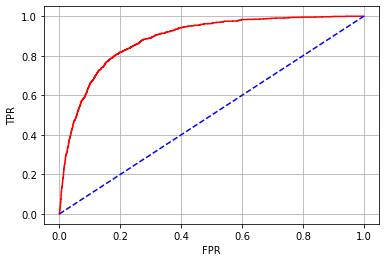

In [96]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test ,y_pred)

fpr , tpr , thresh = roc_curve(y_test , model_1.predict_proba(x_test) [: , 1]) # selecting Thresh based on positives ie > ' '.
plt.plot(fpr, tpr , color = 'red')
plt.plot([0,1],[0,1] , 'b--') # creating center line
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show()

In [98]:
# Threshold is auto calculated based on point where TPR is max and FNR is min .
# As per auc value 64% of data
auc

0.6413619455998203